In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/SRA/combined_data.csv', low_memory=False)
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN


In [4]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916314 entries, 0 to 916313
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                916314 non-null  object 
 1   town                 916314 non-null  object 
 2   flat_type            916314 non-null  object 
 3   block                916314 non-null  object 
 4   street_name          916314 non-null  object 
 5   storey_range         916314 non-null  object 
 6   floor_area_sqm       916314 non-null  float64
 7   flat_model           916314 non-null  object 
 8   lease_commence_date  916314 non-null  int64  
 9   resale_price         916314 non-null  float64
 10  remaining_lease      207264 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ MB


In [5]:
data.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

# Data Cleaning and Feature Engineering

In [6]:
# Extract features from 'month'
data['month'] = pd.to_datetime(data['month'])
data['year'] = data['month'].dt.year
data['month'] = data['month'].dt.month

# Create a new feature 'remaining_lease' based on 'lease_commence_date'
data['remaining_lease'] = data['year'] - data['lease_commence_date']

In [7]:
# Dropping irrelevant features
data.drop(['month', 'block', 'street_name'], axis = 1, inplace=True)

In [8]:
data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,ANG MO KIO,3 ROOM,07 TO 09,69.0,Improved,1986,147000.0,14,2000
1,ANG MO KIO,3 ROOM,04 TO 06,61.0,Improved,1986,144000.0,14,2000
2,ANG MO KIO,3 ROOM,07 TO 09,73.0,New Generation,1976,159000.0,24,2000
3,ANG MO KIO,3 ROOM,07 TO 09,73.0,New Generation,1976,167000.0,24,2000
4,ANG MO KIO,3 ROOM,07 TO 09,67.0,New Generation,1976,163000.0,24,2000
...,...,...,...,...,...,...,...,...,...
916309,YISHUN,EXECUTIVE,10 TO 12,142.0,APARTMENT,1987,456000.0,12,1999
916310,YISHUN,EXECUTIVE,01 TO 03,142.0,APARTMENT,1988,408000.0,11,1999
916311,YISHUN,EXECUTIVE,07 TO 09,146.0,MAISONETTE,1988,469000.0,11,1999
916312,YISHUN,EXECUTIVE,04 TO 06,146.0,MAISONETTE,1988,440000.0,11,1999


# EDA

# 1) Distribution of Resale Prices

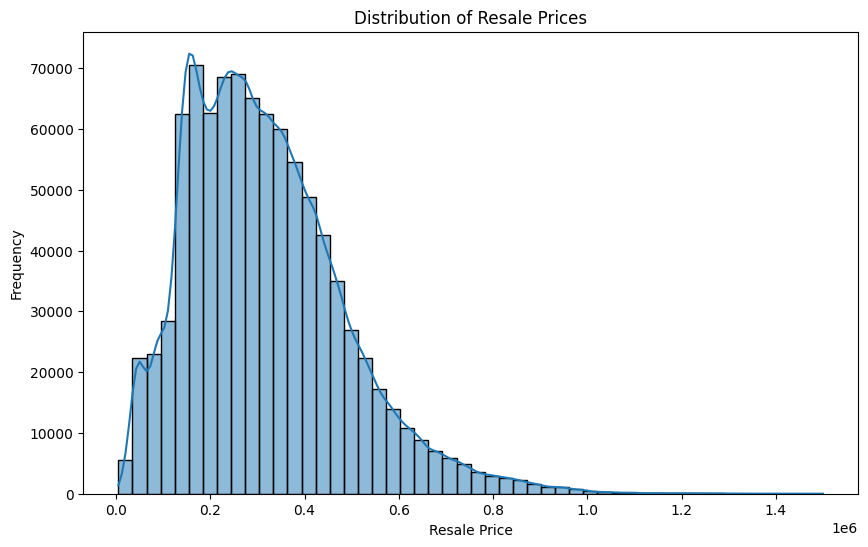

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['resale_price'], bins=50, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

# Observation
Comparing the Distribution of Resale Prices with their frequency we can see that most of the resale prices were between 125000 and 350000 with an average frequency of around 65k listings

# 2) Correlation Heatmap on Numerical data

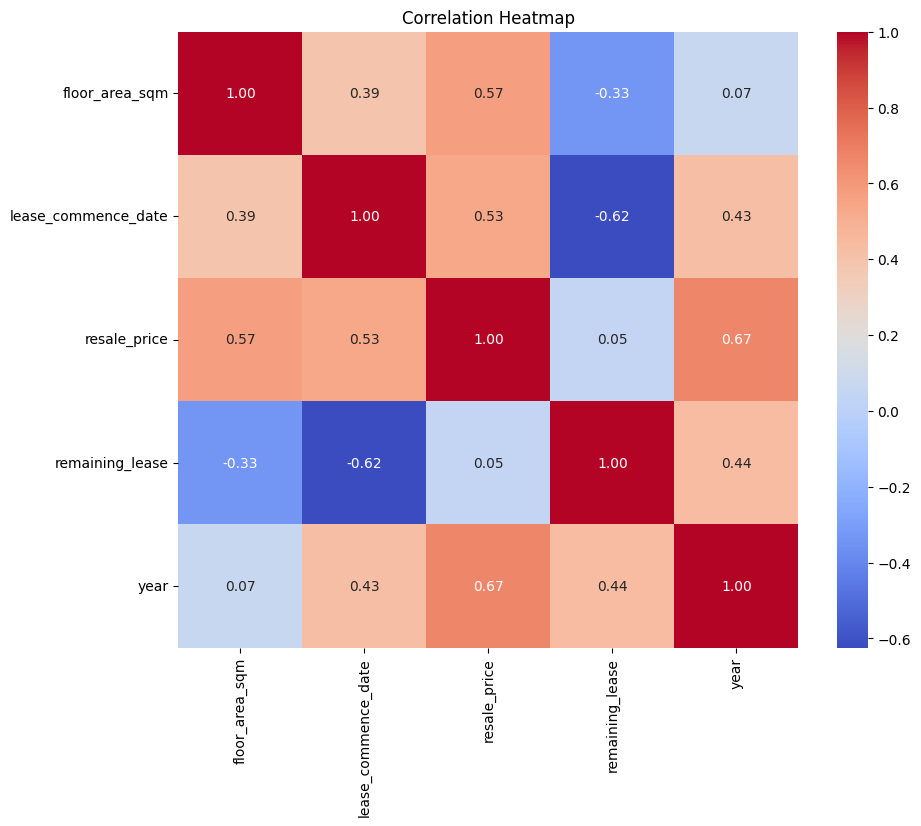

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Observation

From this correlation map, we can see

1) resale_price vs year have positive correlation with 67%

2) remaining_lease vs lease_commence_date have negative coreelation with 62%


# 3) Distribution of Flats by Town

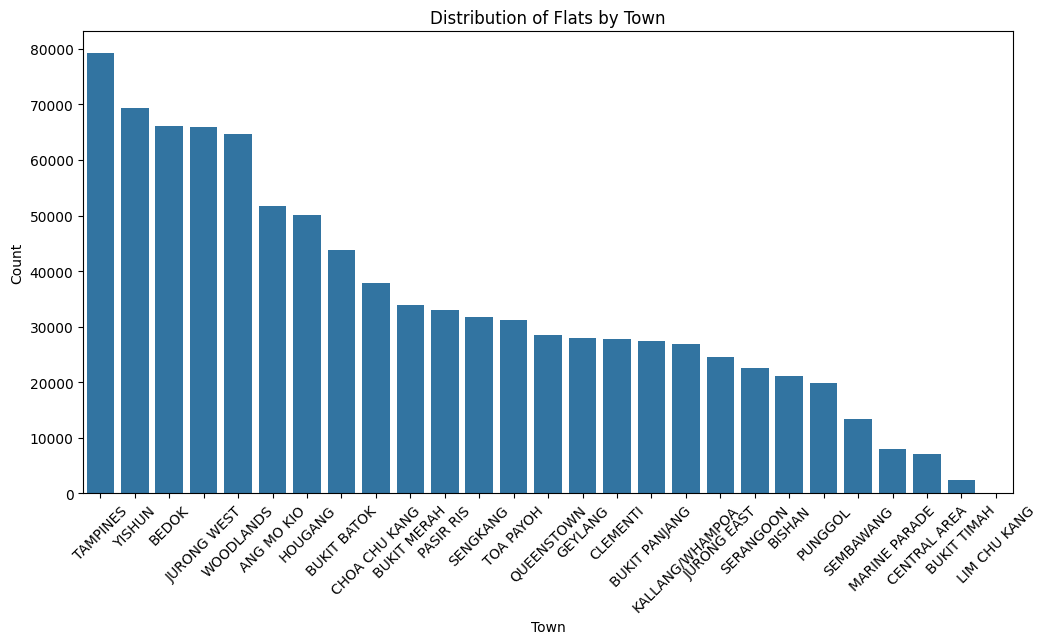

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='town', data=data, order=data['town'].value_counts().index)
plt.title('Distribution of Flats by Town')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Observation

While checking the Distribution of Flats by Town, we have nearly 80K lissting in the Town - Tampines followed by the Town - Yishun with nearly 70K listings


# 4) Resale Prices Over Years

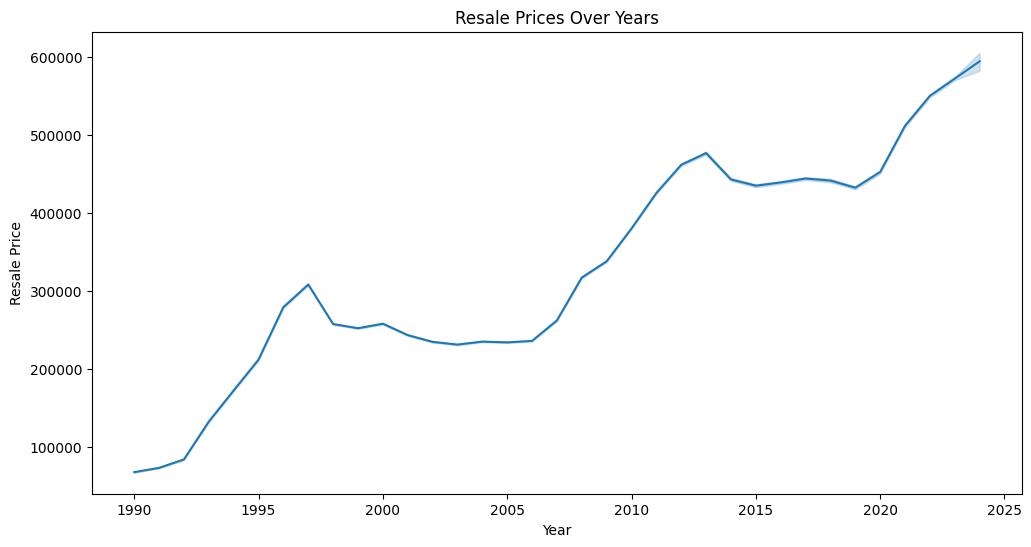

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='resale_price', data=data)
plt.title('Resale Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

# Observation

While checking the resale_price over year we can see there was a gradual increase in the resale_price

There was a drop in 1995 and it continued till 2009 then there was an increase till 2014

Again there was a slight drop nad got increased from 2020

# 5) Boxplot of Floor Area by Flat Type

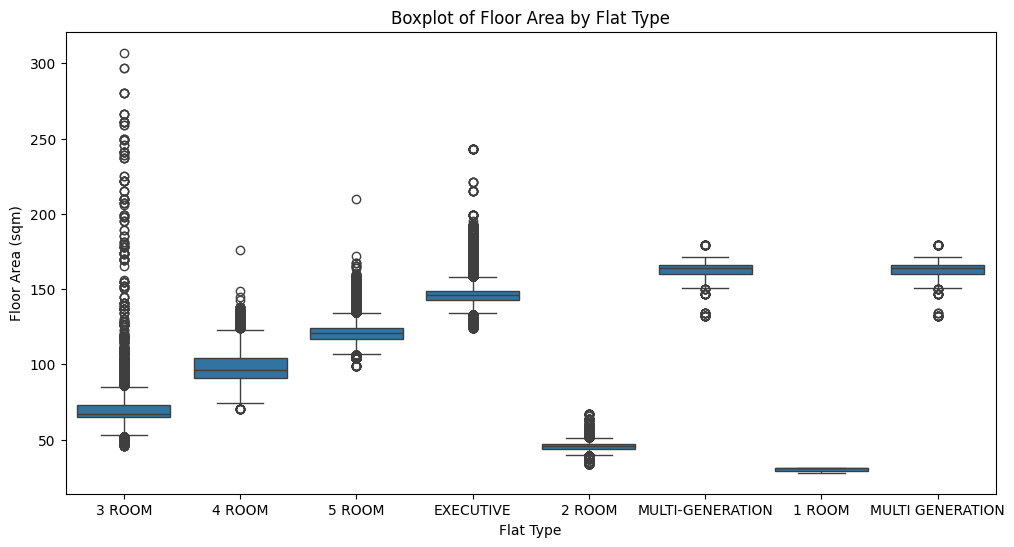

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_type', y='floor_area_sqm', data=data)
plt.title('Boxplot of Floor Area by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Floor Area (sqm)')
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916314 entries, 0 to 916313
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 916314 non-null  object 
 1   flat_type            916314 non-null  object 
 2   storey_range         916314 non-null  object 
 3   floor_area_sqm       916314 non-null  float64
 4   flat_model           916314 non-null  object 
 5   lease_commence_date  916314 non-null  int64  
 6   resale_price         916314 non-null  float64
 7   remaining_lease      916314 non-null  int64  
 8   year                 916314 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 62.9+ MB


# Extracting Numeric and Categoric Features

In [15]:
categorical_features = data.select_dtypes(include='object')
numerical_features = data.select_dtypes(exclude='object')



# Observation
Found that there were multiple duplicated values in the categorical feature 'flat_model'

hence combining it to a unique data


In [16]:
# Convert to uppercase and combine duplicates
for feature in categorical_features:
    data[feature] = data[feature].str.upper()
    data[feature] = data[feature].astype('category')  # Ensure the column remains categorical for memory efficiency
    data[feature] = data[feature].cat.set_categories(data[feature].unique())

data.head()

              town  flat_type storey_range  floor_area_sqm      flat_model  \
0       ANG MO KIO     3 ROOM     07 TO 09            69.0        IMPROVED   
1       ANG MO KIO     3 ROOM     04 TO 06            61.0        IMPROVED   
2       ANG MO KIO     3 ROOM     07 TO 09            73.0  NEW GENERATION   
3       ANG MO KIO     3 ROOM     07 TO 09            73.0  NEW GENERATION   
4       ANG MO KIO     3 ROOM     07 TO 09            67.0  NEW GENERATION   
...            ...        ...          ...             ...             ...   
916309      YISHUN  EXECUTIVE     10 TO 12           142.0       APARTMENT   
916310      YISHUN  EXECUTIVE     01 TO 03           142.0       APARTMENT   
916311      YISHUN  EXECUTIVE     07 TO 09           146.0      MAISONETTE   
916312      YISHUN  EXECUTIVE     04 TO 06           146.0      MAISONETTE   
916313      YISHUN  EXECUTIVE     01 TO 03           145.0      MAISONETTE   

        lease_commence_date  resale_price  remaining_lease  yea

In [17]:
categorical_features.columns

Index(['town', 'flat_type', 'storey_range', 'flat_model'], dtype='object')

In [18]:
categorical_features.flat_model.value_counts()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN', 'SEMBAWANG', 'PUNGGOL', 'LIM CHU KANG'], dtype=object)

In [19]:
# Creating a copy of the DataFrame to avoid modifying the original data
processed_data = data.copy()


In [20]:
processed_data.head(2)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,ANG MO KIO,3 ROOM,07 TO 09,69.0,IMPROVED,1986,147000.0,14,2000
1,ANG MO KIO,3 ROOM,04 TO 06,61.0,IMPROVED,1986,144000.0,14,2000


from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()

for col in categorical_features:
    processed_data[col] = label_encoder.fit_transform(processed_data[col])
    processed_data[col]

# Now 'processed_data' contains encoded categorical features


# Display the first few rows of the processed data
processed_data.head()


# LabelEncoding the Categorical feature

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Your categorical features
categorical_features = ['town', 'flat_type', 'storey_range', 'flat_model']

# Create a dictionary to store label encodings
label_encodings = {}

# Loop through each categorical feature and perform label encoding
for feature in categorical_features:
    le = LabelEncoder()
    # Fit and transform the feature, and store the result in the DataFrame
    processed_data[feature] = le.fit_transform(processed_data[feature])

    # Store the label encoding in the dictionary
    label_encodings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label encodings
for feature, encoding in label_encodings.items():
    print(f"{feature}:  {encoding}")

# Output
# town:  {'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'LIM CHU KANG': 15, 'MARINE PARADE': 16, 'PASIR RIS': 17, 'PUNGGOL': 18, 'QUEENSTOWN': 19, 'SEMBAWANG': 20, 'SENGKANG': 21, 'SERANGOON': 22, 'TAMPINES': 23, 'TOA PAYOH': 24, 'WOODLANDS': 25, 'YISHUN': 26}

# flat_type:  {'1 ROOM': 0, '2 ROOM': 1, '3 ROOM': 2, '4 ROOM': 3, '5 ROOM': 4, 'EXECUTIVE': 5, 'MULTI GENERATION': 6, 'MULTI-GENERATION': 7}

# storey_range:  {'01 TO 03': 0, '01 TO 05': 1, '04 TO 06': 2, '06 TO 10': 3, '07 TO 09': 4, '10 TO 12': 5, '11 TO 15': 6, '13 TO 15': 7, '16 TO 18': 8, '16 TO 20': 9, '19 TO 21': 10, '21 TO 25': 11, '22 TO 24': 12, '25 TO 27': 13, '26 TO 30': 14, '28 TO 30': 15, '31 TO 33': 16, '31 TO 35': 17, '34 TO 36': 18, '36 TO 40': 19, '37 TO 39': 20, '40 TO 42': 21, '43 TO 45': 22, '46 TO 48': 23, '49 TO 51': 24}

# flat_model:  {'2-ROOM': 0, '3GEN': 1, 'ADJOINED FLAT': 2, 'APARTMENT': 3, 'DBSS': 4, 'IMPROVED': 5, 'IMPROVED-MAISONETTE': 6, 'MAISONETTE': 7, 'MODEL A': 8, 'MODEL A-MAISONETTE': 9, 'MODEL A2': 10, 'MULTI GENERATION': 11, 'NEW GENERATION': 12, 'PREMIUM APARTMENT': 13, 'PREMIUM APARTMENT LOFT': 14, 'PREMIUM MAISONETTE': 15, 'SIMPLIFIED': 16, 'STANDARD': 17, 'TERRACE': 18, 'TYPE S1': 19, 'TYPE S2': 20}

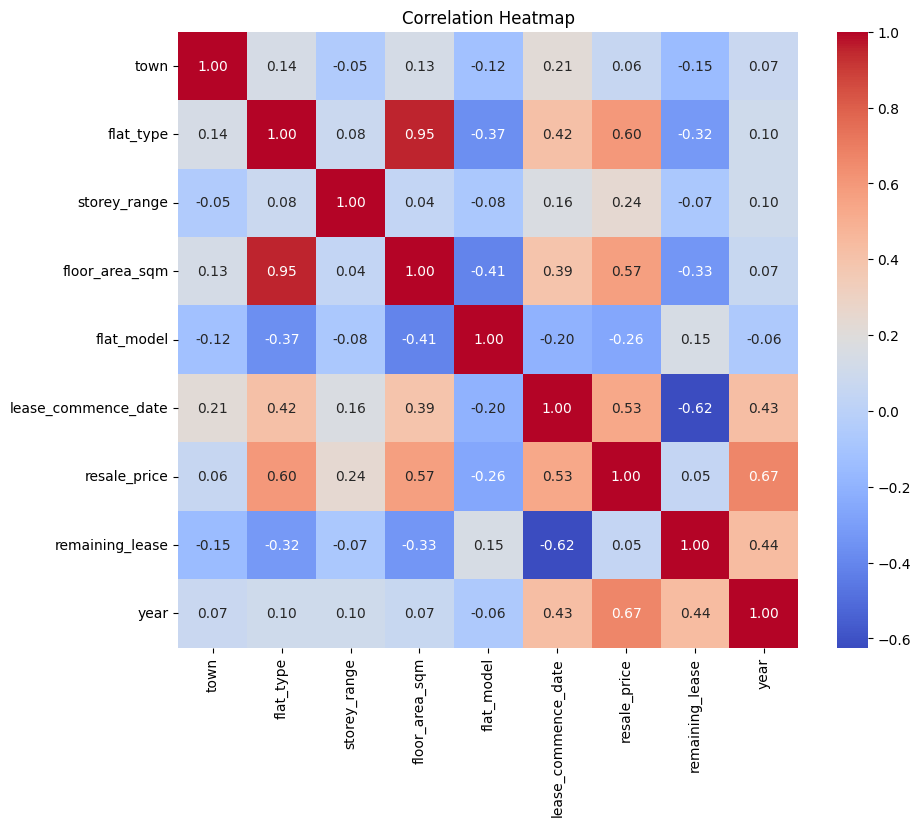

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = processed_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
import pickle
with open('label_encoders.pkl', 'wb') as encoders_file:
    pickle.dump(processed_data, encoders_file)

# with open('label_encoders.pkl', 'rb') as encoders_file:
#   label_encoders = pickle.load(encoders_file)

# Model Training & Evaluation

In [24]:
processed_data.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,0,2,4,69.0,5,1986,147000.0,14,2000
1,0,2,2,61.0,5,1986,144000.0,14,2000
2,0,2,4,73.0,12,1976,159000.0,24,2000
3,0,2,4,73.0,12,1976,167000.0,24,2000
4,0,2,4,67.0,12,1976,163000.0,24,2000
...,...,...,...,...,...,...,...,...,...
916309,26,5,5,142.0,3,1987,456000.0,12,1999
916310,26,5,0,142.0,3,1988,408000.0,11,1999
916311,26,5,4,146.0,7,1988,469000.0,11,1999
916312,26,5,2,146.0,7,1988,440000.0,11,1999


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pickle
from sklearn.metrics import accuracy_score


# Assuming 'processed_data' is your preprocessed DataFrame
features = processed_data.drop(['resale_price'], axis=1)
target = processed_data['resale_price']


# Split the data into training and testing sets

In [30]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Explained_variance_score

Similar to accuracy for a regression problem, we can use a metric called "explained variance score" or "explained variance ratio," which is available in scikit-learn as explained_variance_score.

This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [31]:
# Linear Regression
linear_reg = LinearRegression()

# Hyperparameter tuning using GridSearchCV
param_grid_linear_reg = {}
grid_search_linear_reg = GridSearchCV(linear_reg, param_grid_linear_reg, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search_linear_reg.fit(X_train, y_train)

# Best hyperparameters
best_params_linear_reg = grid_search_linear_reg.best_params_

# Train the model with the best hyperparameters
tuned_linear_reg = grid_search_linear_reg.best_estimator_
tuned_linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear_reg = tuned_linear_reg.predict(X_test)

# Calculate accuracy
accuracy_linear_reg = explained_variance_score(y_test, y_pred_linear_reg)


# Evaluate the model
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

# Display results
print("Linear Regression:")
print(f"Best Hyperparameters: {best_params_linear_reg}")
print(f"Mean Squared Error (MSE): {mse_linear_reg}")
print(f"R2 Score: {r2_linear_reg}")
print(f"Accuracy Score: {accuracy_linear_reg}")


Linear Regression:
Best Hyperparameters: {}
Mean Squared Error (MSE): 6827763148.021332
R2 Score: 0.7574085238131081
Accuracy Score: 0.7574087059425736


In [32]:
# Random Forest
random_forest = RandomForestRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid_random_forest = {'n_estimators': [1, 25]}
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest)
grid_search_random_forest.fit(X_train, y_train)

# Best hyperparameters
best_params_random_forest = grid_search_random_forest.best_params_

# Train the model with the best hyperparameters
tuned_random_forest = grid_search_random_forest.best_estimator_
tuned_random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = tuned_random_forest.predict(X_test)

# Calculate accuracy
accuracy_random_forest = explained_variance_score(y_test, y_pred_random_forest)
print(f"Accuracy Score: {accuracy_random_forest}")

# Evaluate the model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Display results
print("Random Forest:")
print(f"Best Hyperparameters: {best_params_random_forest}")
print(f"Mean Squared Error (MSE): {mse_random_forest}")
print(f"R2 Score: {r2_random_forest}")

Accuracy Score: 0.973906726021855
Random Forest:
Best Hyperparameters: {'n_estimators': 25}
Mean Squared Error (MSE): 734407365.5355076
R2 Score: 0.973906393197102


In [33]:
# Gradient Boosting
gradient_boosting = GradientBoostingRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid_gradient_boosting = {'n_estimators': [10,25], 'learning_rate': [0.01, 0.1]}
grid_search_gradient_boosting = GridSearchCV(gradient_boosting, param_grid_gradient_boosting)
grid_search_gradient_boosting.fit(X_train, y_train)

# Best hyperparameters
best_params_gradient_boosting = grid_search_gradient_boosting.best_params_

# Train the model with the best hyperparameters
tuned_gradient_boosting = grid_search_gradient_boosting.best_estimator_
tuned_gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gradient_boosting = tuned_gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy_gradient_boosting = explained_variance_score(y_test, y_pred_gradient_boosting)
print(f"Accuracy Score: {accuracy_gradient_boosting}")

# Evaluate the model
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

# Display results
print("Gradient Boosting:")
print(f"Best Hyperparameters: {best_params_gradient_boosting}")
print(f"Mean Squared Error (MSE): {mse_gradient_boosting}")
print(f"R2 Score: {r2_gradient_boosting}")

Accuracy Score: 0.8286366735918886
Gradient Boosting:
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 25}
Mean Squared Error (MSE): 4823039233.233168
R2 Score: 0.8286366732512681


In [34]:
# Since SVM perform primarly good on small datasets we'll skip this algorithm

In [35]:


# Elastic Net Regression
elastic_net = ElasticNet()

# Hyperparameter tuning using GridSearchCV
param_grid_elastic_net = {'alpha': [0.1, 1], 'l1_ratio': [0.1, 0.5]}
grid_search_elastic_net = GridSearchCV(elastic_net, param_grid_elastic_net, scoring='neg_mean_squared_error')
grid_search_elastic_net.fit(X_train, y_train)

# Best hyperparameters
best_params_elastic_net = grid_search_elastic_net.best_params_

# Train the model with the best hyperparameters
tuned_elastic_net = grid_search_elastic_net.best_estimator_
tuned_elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred_elastic_net = tuned_elastic_net.predict(X_test)

# Calculate accuracy
accuracy_elastic_net = explained_variance_score(y_test, y_pred_elastic_net)
print(f"Accuracy Score: {accuracy_elastic_net}")

# Evaluate the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

# Display results
print("Elastic Net Regression:")
print(f"Best Hyperparameters: {best_params_elastic_net}")
print(f"Mean Squared Error (MSE): {mse_elastic_net}")
print(f"R2 Score: {r2_elastic_net}")


Accuracy Score: 0.7566399124400187
Elastic Net Regression:
Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.5}
Mean Squared Error (MSE): 6849402333.3885975
R2 Score: 0.7566396802243776


In [36]:


# Lasso Regression
lasso = Lasso()

# Hyperparameter tuning using GridSearchCV
param_grid_lasso = {'alpha': [0.1, 1]}
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Best hyperparameters
best_params_lasso = grid_search_lasso.best_params_

# Train the model with the best hyperparameters
tuned_lasso = grid_search_lasso.best_estimator_
tuned_lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = tuned_lasso.predict(X_test)

# Calculate accuracy
accuracy_lasso = explained_variance_score(y_test, y_pred_lasso)
print(f"Accuracy Score: {accuracy_lasso}")

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display results
print("Lasso Regression:")
print(f"Best Hyperparameters: {best_params_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R2 Score: {r2_lasso}")


Accuracy Score: 0.757406544866162
Lasso Regression:
Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error (MSE): 6827824407.543677
R2 Score: 0.7574063472528446


In [37]:


# SGD Regressor
sgd_regressor = SGDRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid_sgd = {'alpha': [0.0001, 0.01], 'learning_rate': ['adaptive']}
grid_search_sgd = GridSearchCV(sgd_regressor, param_grid_sgd, scoring='neg_mean_squared_error')
grid_search_sgd.fit(X_train, y_train)

# Best hyperparameters
best_params_sgd = grid_search_sgd.best_params_

# Train the model with the best hyperparameters
tuned_sgd_regressor = grid_search_sgd.best_estimator_
tuned_sgd_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sgd_regressor = tuned_sgd_regressor.predict(X_test)

# Calculate accuracy
accuracy_sgd_regressor = explained_variance_score(y_test, y_pred_sgd_regressor)
print(f"Accuracy Score: {accuracy_sgd_regressor}")

# Evaluate the model
mse_sgd_regressor = mean_squared_error(y_test, y_pred_sgd_regressor)
r2_sgd_regressor = r2_score(y_test, y_pred_sgd_regressor)

# Display results
print("Stochastic Gradient Descent (SGD) Regressor:")
print(f"Best Hyperparameters: {best_params_sgd}")
print(f"Mean Squared Error (MSE): {mse_sgd_regressor}")
print(f"R2 Score: {r2_sgd_regressor}")


Accuracy Score: -9932432015760.469
Stochastic Gradient Descent (SGD) Regressor:
Best Hyperparameters: {'alpha': 0.01, 'learning_rate': 'adaptive'}
Mean Squared Error (MSE): 5.332664984648295e+24
R2 Score: -189470408183516.38


In [38]:
# K-Nearest Neighbors
knn = KNeighborsRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5]}
grid_search_knn = GridSearchCV(knn, param_grid_knn)
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Train the model with the best hyperparameters
tuned_knn = grid_search_knn.best_estimator_
tuned_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = tuned_knn.predict(X_test)

# Calculate accuracy
accuracy_knn = explained_variance_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy_knn}")

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Display results
print("K-Nearest Neighbors:")
print(f"Best Hyperparameters: {best_params_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R2 Score: {r2_knn}")


Accuracy Score: 0.9565279179833382
K-Nearest Neighbors:
Best Hyperparameters: {'n_neighbors': 5}
Mean Squared Error (MSE): 1225444490.797535
R2 Score: 0.9564597685123539


In [39]:
import pickle

# Dictionary to store metrics for each algorithm
metrics_dict = {
    'linear_regression': {'mse': mse_linear_reg, 'r2': r2_linear_reg, 'accuracy':accuracy_linear_reg },
    'random_forest': {'mse': mse_random_forest, 'r2': r2_random_forest, 'accuracy':accuracy_random_forest},
    'gradient_boosting': {'mse': mse_gradient_boosting, 'r2': r2_gradient_boosting, 'accuracy':accuracy_gradient_boosting},
    'enr': {'mse': mse_elastic_net, 'r2': r2_elastic_net, 'accuracy':accuracy_elastic_net},
    'sgd': {'mse': mse_sgd_regressor, 'r2': r2_sgd_regressor, 'accuracy':accuracy_sgd_regressor},
    'lasso': {'mse': mse_lasso, 'r2': r2_lasso, 'accuracy':accuracy_lasso},
    'knn': {'mse': mse_knn, 'r2': r2_knn, 'accuracy':accuracy_knn}
}

# Find the algorithm with the minimum MSE and maximum R2 Score
best_mse_algorithm = min(metrics_dict, key=lambda x: metrics_dict[x]['mse'])
best_r2_algorithm = max(metrics_dict, key=lambda x: metrics_dict[x]['r2'])
best_accuracy_algorithm = max(metrics_dict, key=lambda x: metrics_dict[x]['accuracy'])

# Choose the best algorithm based on MSE or R2 Score
if metrics_dict[best_mse_algorithm]['mse'] <= metrics_dict[best_r2_algorithm]['r2']:
    best_algorithm = best_mse_algorithm
else:
    best_algorithm = best_r2_algorithm

# Store the best model in a pickle file
best_model_filename = f"{best_algorithm}_best_model.pkl"

if best_algorithm == 'linear_regression':
    best_model = tuned_linear_reg
elif best_algorithm == 'random_forest':
    best_model = tuned_random_forest
elif best_algorithm == 'gradient_boosting':
    best_model = tuned_gradient_boosting
elif best_algorithm == 'enr':
    best_model = tuned_elastic_net
elif best_algorithm == 'sgd':
    best_model = tuned_sgd_regressor
elif best_algorithm == 'lasso':
    best_model = tuned_lasso
elif best_algorithm == 'knn':
    best_model = tuned_knn

# Save the best model to the pickle file
with open(best_model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"\nBest Algorithm based on MSE or R2 Score: {best_algorithm}")
print(f"Best Model saved to: {best_model_filename}")



Best Algorithm based on MSE or R2 Score: random_forest
Best Model saved to: random_forest_best_model.pkl


In [52]:
best_accuracy_algorithm = max(metrics_dict, key=lambda x: metrics_dict[x]['accuracy'])
best_accuracy_algorithm

for i in metrics_dict:
  print(i, ': ',metrics_dict[i]['accuracy'])

linear_regression :  0.7574087059425736
random_forest :  0.973906726021855
gradient_boosting :  0.8286366735918886
enr :  0.7566399124400187
sgd :  -9932432015760.469
lasso :  0.757406544866162
knn :  0.9565279179833382


# Testing using new data

In [57]:
import pandas as pd
import pickle

# Your concatenated_dict (assuming it contains label encodings)
concatenated_dict = {
'town':  {'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'LIM CHU KANG': 15, 'MARINE PARADE': 16, 'PASIR RIS': 17, 'PUNGGOL': 18, 'QUEENSTOWN': 19, 'SEMBAWANG': 20, 'SENGKANG': 21, 'SERANGOON': 22, 'TAMPINES': 23, 'TOA PAYOH': 24, 'WOODLANDS': 25, 'YISHUN': 26},
'flat_type':  {'1 ROOM': 0, '2 ROOM': 1, '3 ROOM': 2, '4 ROOM': 3, '5 ROOM': 4, 'EXECUTIVE': 5, 'MULTI GENERATION': 6, 'MULTI-GENERATION': 7},
'storey_range':  {'01 TO 03': 0, '01 TO 05': 1, '04 TO 06': 2, '06 TO 10': 3, '07 TO 09': 4, '10 TO 12': 5, '11 TO 15': 6, '13 TO 15': 7, '16 TO 18': 8, '16 TO 20': 9, '19 TO 21': 10, '21 TO 25': 11, '22 TO 24': 12, '25 TO 27': 13, '26 TO 30': 14, '28 TO 30': 15, '31 TO 33': 16, '31 TO 35': 17, '34 TO 36': 18, '36 TO 40': 19, '37 TO 39': 20, '40 TO 42': 21, '43 TO 45': 22, '46 TO 48': 23, '49 TO 51': 24},
'flat_model':  {'2-ROOM': 0, '3GEN': 1, 'ADJOINED FLAT': 2, 'APARTMENT': 3, 'DBSS': 4, 'IMPROVED': 5, 'IMPROVED-MAISONETTE': 6, 'MAISONETTE': 7, 'MODEL A': 8, 'MODEL A-MAISONETTE': 9, 'MODEL A2': 10, 'MULTI GENERATION': 11, 'NEW GENERATION': 12, 'PREMIUM APARTMENT': 13, 'PREMIUM APARTMENT LOFT': 14, 'PREMIUM MAISONETTE': 15, 'SIMPLIFIED': 16, 'STANDARD': 17, 'TERRACE': 18, 'TYPE S1': 19, 'TYPE S2': 20}
}


# Your new_data DataFrame
new_data = pd.DataFrame({
    'town': ['ANG MO KIO'],
    'flat_type': ['3 ROOM'],
    'storey_range': ['07 TO 09'],
    'floor_area_sqm': [69.0],
    'flat_model': ['IMPROVED'],
    'lease_commence_date': [1986],
    'remaining_lease': [14],
    'year': [2000]
})

# Function to get label encoding for each column in a row
def get_label_encoding(row):
    label_encodings = {}
    for col, value in row.items():
        if col in concatenated_dict and value in concatenated_dict[col]:
            label_encodings[col] = concatenated_dict[col][value]
        else:
            label_encodings[col] = value

    return label_encodings

# Apply the function to each row in new_data
new_data_label_encodings = new_data.apply(get_label_encoding, axis=1)

# Load the best model from the pickle file
model_filename = "/content/random_forest_best_model.pkl"  # Replace with the actual filename
with open(model_filename, 'rb') as model_file:
    best_model = pickle.load(model_file)

# Convert label encodings to a DataFrame
new_data_encoded = pd.DataFrame(list(new_data_label_encodings))

# Make predictions on the new sample data
new_data_predictions = best_model.predict(new_data_encoded)

# Display the predictions
print("Predicted Resale Price:", new_data_predictions)


Predicted Resale Price: [152234.28571429]


# Streamlit app

In [ ]:
!pip install streamlit easyocr pillow -q


In [58]:
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# # Load the best model from the pickle file
# best_model_filename = '/content/drive/MyDrive/SRA/random_forest_best_model.pkl'
# with open(best_model_filename, 'rb') as model_file:
#     loaded_model = pickle.load(model_file)

# Your concatenated_dict (assuming it contains label encodings)
concatenated_dict = {
'town':  {'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'LIM CHU KANG': 15, 'MARINE PARADE': 16, 'PASIR RIS': 17, 'PUNGGOL': 18, 'QUEENSTOWN': 19, 'SEMBAWANG': 20, 'SENGKANG': 21, 'SERANGOON': 22, 'TAMPINES': 23, 'TOA PAYOH': 24, 'WOODLANDS': 25, 'YISHUN': 26},
'flat_type':  {'1 ROOM': 0, '2 ROOM': 1, '3 ROOM': 2, '4 ROOM': 3, '5 ROOM': 4, 'EXECUTIVE': 5, 'MULTI GENERATION': 6, 'MULTI-GENERATION': 7},
'storey_range':  {'01 TO 03': 0, '01 TO 05': 1, '04 TO 06': 2, '06 TO 10': 3, '07 TO 09': 4, '10 TO 12': 5, '11 TO 15': 6, '13 TO 15': 7, '16 TO 18': 8, '16 TO 20': 9, '19 TO 21': 10, '21 TO 25': 11, '22 TO 24': 12, '25 TO 27': 13, '26 TO 30': 14, '28 TO 30': 15, '31 TO 33': 16, '31 TO 35': 17, '34 TO 36': 18, '36 TO 40': 19, '37 TO 39': 20, '40 TO 42': 21, '43 TO 45': 22, '46 TO 48': 23, '49 TO 51': 24},
'flat_model':  {'2-ROOM': 0, '3GEN': 1, 'ADJOINED FLAT': 2, 'APARTMENT': 3, 'DBSS': 4, 'IMPROVED': 5, 'IMPROVED-MAISONETTE': 6, 'MAISONETTE': 7, 'MODEL A': 8, 'MODEL A-MAISONETTE': 9, 'MODEL A2': 10, 'MULTI GENERATION': 11, 'NEW GENERATION': 12, 'PREMIUM APARTMENT': 13, 'PREMIUM APARTMENT LOFT': 14, 'PREMIUM MAISONETTE': 15, 'SIMPLIFIED': 16, 'STANDARD': 17, 'TERRACE': 18, 'TYPE S1': 19, 'TYPE S2': 20}
}



# Function to get label encoding for each column in a row
def get_label_encoding(row):
    label_encodings = {}
    for col, value in row.items():
        if col in concatenated_dict and value in concatenated_dict[col]:
            label_encodings[col] = concatenated_dict[col][value]
        else:
            label_encodings[col] = value

    return label_encodings



# Function to make predictions
def predict_price(year, flat_type, storey_range, floor_area_sqm, flat_model, lease_commence_date, remaining_lease, town):
    # Create a DataFrame with user inputs
    user_input = pd.DataFrame({
        'year': [year],
        'flat_type': [flat_type],
        'storey_range': [storey_range],
        'floor_area_sqm': [floor_area_sqm],
        'flat_model': [flat_model],
        'lease_commence_date': [lease_commence_date],
        'remaining_lease': [remaining_lease],
        'town': [town]
    })

    # Apply the function to each row in new_data
    new_data_label_encodings = user_input.apply(get_label_encoding, axis=1)

    # Load the best model from the pickle file
    model_filename = "/content/drive/MyDrive/SRA/random_forest_best_model.pkl"  # Replace with the actual filename
    with open(model_filename, 'rb') as model_file:
        best_model = pickle.load(model_file)


    # Convert label encodings to a DataFrame
    new_data_encoded = pd.DataFrame(list(new_data_label_encodings))

    # Make predictions on the new sample data
    new_data_predictions = best_model.predict(new_data_encoded)

    # Display the predictions

    return print("Predicted Resale Price:", new_data_predictions)

# Streamlit App
st.title('HDB Resale Price Prediction')

# Input fields for user to enter data
year = st.slider('Select Year', 2017, 2023, 2020)
flat_type = st.selectbox('Select Flat Type', data['flat_type'].unique())
storey_range = st.selectbox('Select Storey Range', data['storey_range'].unique())
floor_area_sqm = st.slider('Select Floor Area (sqm)', 30, 200, 80)
flat_model = st.selectbox('Select Flat Model', data['flat_model'].unique())
lease_commence_date = st.slider('Select Lease Commence Date', 1960, 2023, 1980)
remaining_lease = st.slider('Select Remaining Lease', 0, 99, 50)
town = st.selectbox('Select Town', data['town'].unique())

# Make prediction when the 'Predict' button is clicked
if st.button('Predict'):
    predicted_price = predict_price(year, flat_type, storey_range, floor_area_sqm, flat_model, lease_commence_date, remaining_lease, town)
    st.success(f'The predicted resale price is: ${predicted_price:,.2f}')


2024-01-21 08:15:30.999 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [64]:
categorical_features.columns

Index(['town', 'flat_type', 'storey_range', 'flat_model'], dtype='object')

# Running streamlit app in Colab

In [61]:
%%writefile app.py


import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder


# Your concatenated_dict (assuming it contains label encodings)
concatenated_dict = {
'town':  {'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'LIM CHU KANG': 15, 'MARINE PARADE': 16, 'PASIR RIS': 17, 'PUNGGOL': 18, 'QUEENSTOWN': 19, 'SEMBAWANG': 20, 'SENGKANG': 21, 'SERANGOON': 22, 'TAMPINES': 23, 'TOA PAYOH': 24, 'WOODLANDS': 25, 'YISHUN': 26},
'flat_type':  {'1 ROOM': 0, '2 ROOM': 1, '3 ROOM': 2, '4 ROOM': 3, '5 ROOM': 4, 'EXECUTIVE': 5, 'MULTI GENERATION': 6, 'MULTI-GENERATION': 7},
'storey_range':  {'01 TO 03': 0, '01 TO 05': 1, '04 TO 06': 2, '06 TO 10': 3, '07 TO 09': 4, '10 TO 12': 5, '11 TO 15': 6, '13 TO 15': 7, '16 TO 18': 8, '16 TO 20': 9, '19 TO 21': 10, '21 TO 25': 11, '22 TO 24': 12, '25 TO 27': 13, '26 TO 30': 14, '28 TO 30': 15, '31 TO 33': 16, '31 TO 35': 17, '34 TO 36': 18, '36 TO 40': 19, '37 TO 39': 20, '40 TO 42': 21, '43 TO 45': 22, '46 TO 48': 23, '49 TO 51': 24},
'flat_model':  {'2-ROOM': 0, '3GEN': 1, 'ADJOINED FLAT': 2, 'APARTMENT': 3, 'DBSS': 4, 'IMPROVED': 5, 'IMPROVED-MAISONETTE': 6, 'MAISONETTE': 7, 'MODEL A': 8, 'MODEL A-MAISONETTE': 9, 'MODEL A2': 10, 'MULTI GENERATION': 11, 'NEW GENERATION': 12, 'PREMIUM APARTMENT': 13, 'PREMIUM APARTMENT LOFT': 14, 'PREMIUM MAISONETTE': 15, 'SIMPLIFIED': 16, 'STANDARD': 17, 'TERRACE': 18, 'TYPE S1': 19, 'TYPE S2': 20}
}

flat_type = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM', 'MULTI-GENERATION', '1 ROOM', 'MULTI GENERATION']

storey_range = ['07 TO 09', '04 TO 06', '01 TO 03', '10 TO 12', '13 TO 15', '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '49 TO 51', '46 TO 48', '43 TO 45', '06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35']

flat_model =  ['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'APARTMENT', 'SIMPLIFIED', 'MODEL A-MAISONETTE', 'MAISONETTE', 'MULTI GENERATION', 'ADJOINED FLAT', 'PREMIUM APARTMENT', 'TERRACE', 'IMPROVED-MAISONETTE', 'PREMIUM MAISONETTE', '2-ROOM', 'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT', '3GEN']

town = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'SEMBAWANG', 'PUNGGOL', 'LIM CHU KANG']


# Function to get label encoding for each column in a row
def get_label_encoding(row):
    label_encodings = {}
    for col, value in row.items():
        if col in concatenated_dict and value in concatenated_dict[col]:
            label_encodings[col] = concatenated_dict[col][value]
        else:
            label_encodings[col] = value

    return label_encodings


# Function to make predictions
def predict_price(year, flat_type, storey_range, floor_area_sqm, flat_model, lease_commence_date, remaining_lease, town):
    # Create a DataFrame with user inputs
    user_input = pd.DataFrame({
        'year': [year],
        'flat_type': [flat_type],
        'storey_range': [storey_range],
        'floor_area_sqm': [floor_area_sqm],
        'flat_model': [flat_model],
        'lease_commence_date': [lease_commence_date],
        'remaining_lease': [remaining_lease],
        'town': [town]
    })

    # Apply the function to each row in new_data
    new_data_label_encodings = user_input.apply(get_label_encoding, axis=1)

    # Convert label encodings to a DataFrame
    new_data_encoded = pd.DataFrame(list(new_data_label_encodings))

    # Ensure the column order matches the order during training
    model_filename = "/content/drive/MyDrive/SRA/random_forest_best_model.pkl"  # Replace with the actual filename
    with open(model_filename, 'rb') as model_file:
        best_model = pickle.load(model_file)

    # Get the feature names from the trained model
    model_feature_names = best_model.feature_names_in_

    # Reorder columns to match the feature order during training
    new_data_encoded = new_data_encoded[model_feature_names]

    # Make predictions on the new sample data
    new_data_predictions = best_model.predict(new_data_encoded)

    # Extract the predicted price (assuming it's a scalar value)
    predicted_price = new_data_predictions[0]

    # Display the predictions
    return predicted_price


# Streamlit App
st.title('HDB Resale Price Prediction')

# Input fields for user to enter data
year = st.slider('Select Year', 2017, 2023, 2020)
flat_type = st.selectbox('Select Flat Type', flat_type)
storey_range = st.selectbox('Select Storey Range', storey_range)
floor_area_sqm = st.slider('Select Floor Area (sqm)', 30, 200, 80)
flat_model = st.selectbox('Select Flat Model', flat_model)
lease_commence_date = st.slider('Select Lease Commence Date', 1960, 2023, 1980)
remaining_lease = st.slider('Select Remaining Lease', 0, 99, 50)
town = st.selectbox('Select Town', town)

# Make prediction when the 'Predict' button is clicked
if st.button('Predict'):
    predicted_price = predict_price(year, flat_type, storey_range, floor_area_sqm, flat_model, lease_commence_date, remaining_lease, town)
    st.success(f'The predicted resale price is: ${predicted_price:,.2f}')




Writing app.py


In [59]:
!wget -q -O - ipv4.icanhazip.com


35.245.245.179


In [60]:
! npm install -g localtunnel


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.854s


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.245.179:8501

npx: installed 22 in 4.243s
your url is: https://twelve-houses-search.loca.lt
2024-01-21 08:52:27.292 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 95, in <module>
    predicted_price = predict_price(year, flat_type, storey_range, floor_area_sqm, flat_model, lease_commence_date, remaining_lease, town)
  File "/content/app.py", line 67, in predict_price
    new_data_encoded = new_data_encoded[data.drop('resale_price', axis=1).columns]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 3813, in __getitem__
    indexer = self.columns._get_indexer_strict